In [1]:
import os, sys
import pandas as pd
import numpy as np
import glob
import math
import collections
import tqdm

import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")

def extract_experiment_info(file):
    name = file.split('/')[-1]
    return float(name.split('_')[-1])



In [101]:
def visual_hypertuning_results(path):
    files = glob.glob(os.path.join(path, '*'))
    experiment_lrs = [extract_experiment_info(x) for x in files]
    
    table_huge = []
    for exp, lr in zip(files, experiment_lrs):
        hists = pd.read_csv(os.path.join(exp, 'history.csv'), index_col=0)
        hists['lr'] = lr
        table_huge.append(hists)

    table_huge=pd.concat(table_huge)
    
    for metric in ['auc', 'unexp']:
        g = sns.relplot(
            data=table_huge,
            x="epoch", y=metric, col="phase", 
            hue="lr",
            kind="line", palette="Paired",
            linewidth=2, 
            height=5, 
            aspect=1.2, 
            legend='full',
            facet_kws={'sharey':False}
        )
        
    best_val = table_huge[table_huge.phase=='validation'].groupby(['lr']).max()
    best_val['lr'] = best_val.index
    
    fig, axs = plt.subplots(figsize=(14, 5), ncols=2)
    barlist = axs[0].bar(x = range(len(best_val)), height=best_val.auc, 
                         color= matplotlib.cm.get_cmap('Paired').colors)
    
    axs[0].set_xticks(range(len(best_val)))
    axs[0].set_xticklabels(['%2.2f'%x for x in best_val.index], rotation=30)
    axs[0].set_ylim([0.758, 0.77])
    axs[0].set_ylabel('validation AUC')
    axs[0].set_xlabel('learning rate')

    axs[1].bar(x = range(len(best_val)), height=best_val.unexp,
               color= matplotlib.cm.get_cmap('Paired').colors)
    axs[1].set_xticks(range(len(best_val)))
    axs[1].set_xticklabels( ['%2.2f'%x for x in best_val.index], rotation=30)
    axs[1].set_ylabel('validation unexp')
    axs[1].set_xlabel('learning rate')
    
    return table_huge, best_val

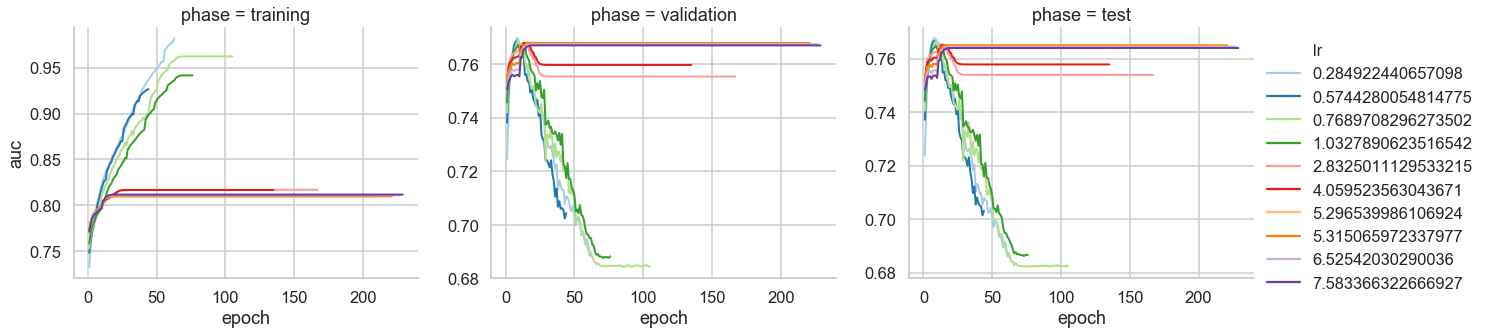

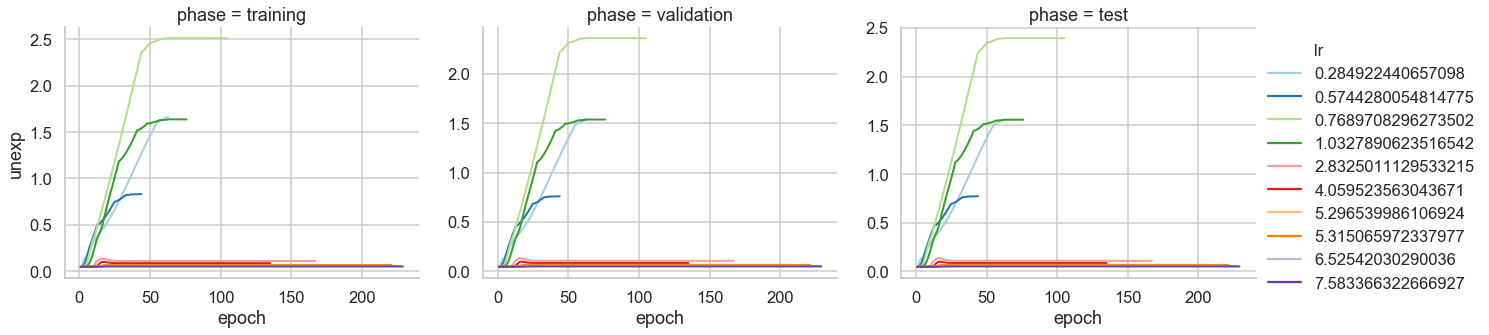

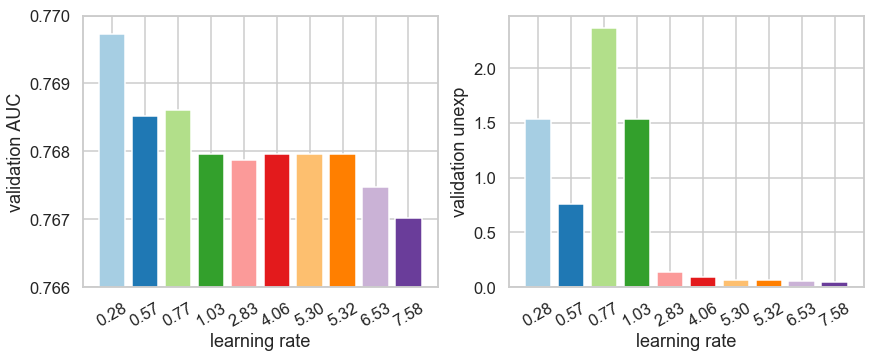

In [98]:
path = '../logs/logs/metabeer_50'
table_huge_meta, best_val_meta = visual_hypertuning_results(path)

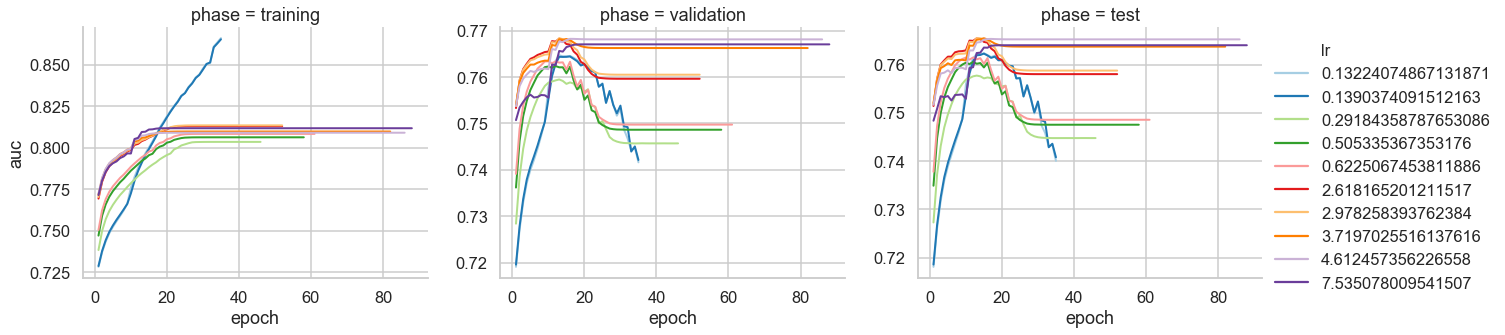

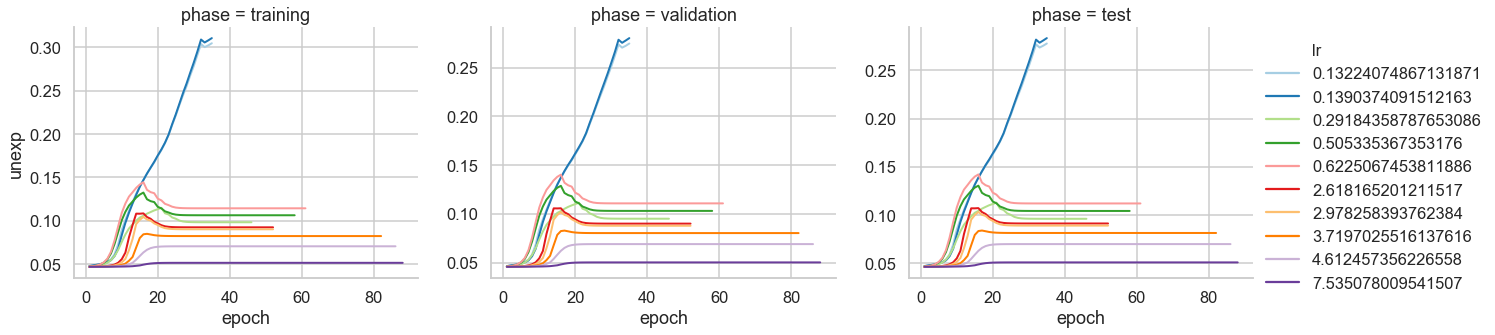

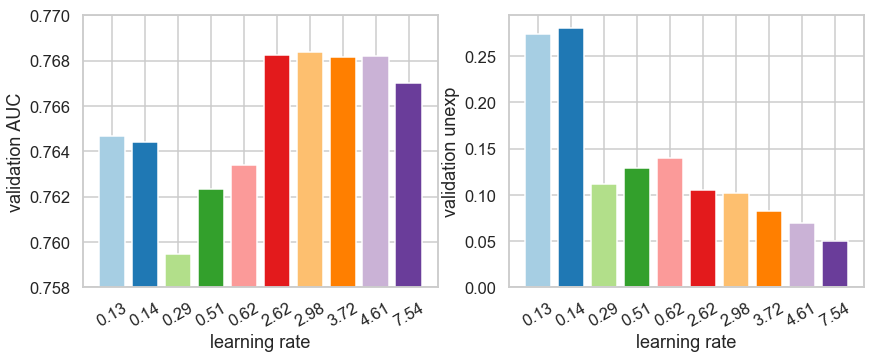

In [102]:
path = '../logs/beer_baseline'
table_huge, best_val = visual_hypertuning_results(path)